In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [39]:
df=pd.read_excel('Excel_book_1.xlsx')

In [40]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

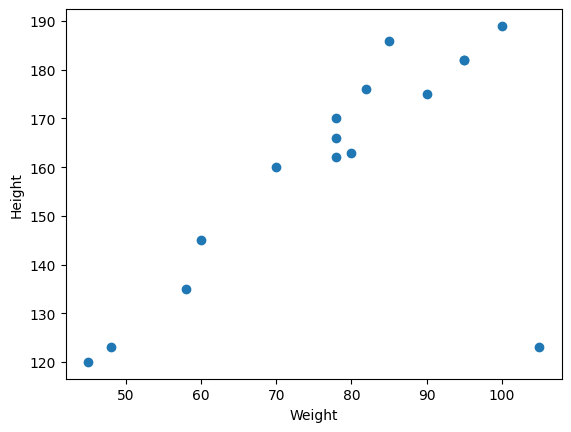

In [41]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [42]:
df.corr()

,Weight,Height
Weight,1.000000,0.637879
Height,0.637879,1.000000


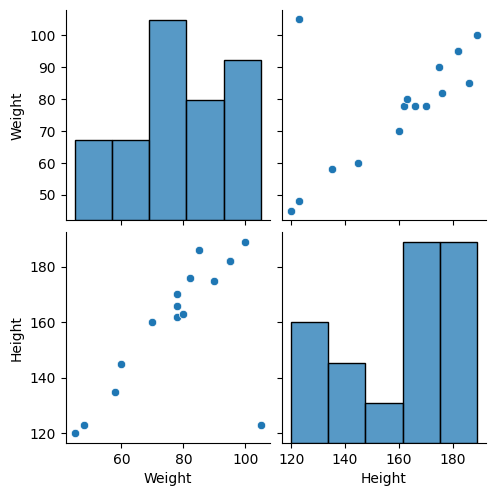

In [43]:
sns.pairplot(df)

In [44]:
##indepandent and dependent variable
X=df[['Weight']]
y=df['Height']
np.array(X).shape

(16, 1)

In [45]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    123
13    189
14    186
15    166
Name: Height, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
 

In [47]:
X_train.shape

(12, 1)

In [48]:
##Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.14020752],
       [ 0.8278219 ],
       [ 0.8278219 ],
       [-0.23428922],
       [-2.10860295],
       [-0.23428922],
       [-0.73410621],
       [ 0.51543628],
       [ 0.01561928],
       [ 1.45259314],
       [-1.35887746],
       [-0.10933497]])

In [49]:
X_test=scaler.transform(X_test)

In [50]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [51]:
##Apply linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [9.83754388]
Intercept: 162.83333333333334


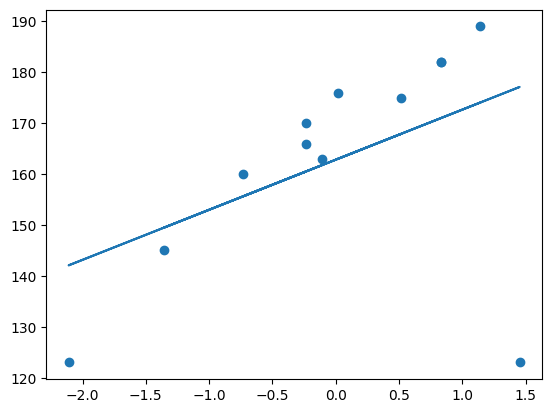

In [54]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction for test data

1. Predicted height output=intercept+coef_(Weights)
2. y_pred_test=156.470 + 17.29(X_test)

In [55]:
y_pred=regression.predict(X_test)

In [56]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

258.8480121780465
14.030678214198588
16.088754214607373


### R^2

In [58]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5959839825530442


### Adjusted R2 

In [59]:
1-(1-score)*(len(y_test)-1)//(len(y_test)-X_test.shape[1]-1)

1.0

### OLS Linear Regression

In [61]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.6 MB 4.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 4.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 4.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 5.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------

In [62]:
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[-22.58733838 -14.59725949  -2.30483045   1.99751972]


In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.087
Method:                 Least Squares   F-statistic:                            0.03963
Date:                Sun, 24 Aug 2025   Prob (F-statistic):                       0.846
Time:                        21:44:54   Log-Likelihood:                         -78.218
No. Observations:                  12   AIC:                                      158.4
Df Residuals:                      11   BIC:                                      158.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
##Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\UdemyFinal\DeepLearning_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.84077417])